<a href="https://colab.research.google.com/github/AnuSanal/Anu-Sanal/blob/master/bitcoin_sentiment_analysis_and_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
!unzip '/content/drive/MyDrive/Group3-MIni Project/tweets.csv.zip'

Archive:  /content/drive/MyDrive/Group3-MIni Project/tweets.csv.zip
  inflating: tweets.csv              


In [ ]:
ls

drive/  sample_data/  tweets.csv


**LOAD DATASET OF TWEETS RELATED TO BITCOIN**

In [ ]:
df = pd.read_csv("tweets.csv",sep=';',usecols=['timestamp','text'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head(10)

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
5,2019-05-27 11:49:25+00,#btc inceldiği yerden kopsun bakalım 17:00 ye ...
6,2019-05-27 11:49:25+00,@nwoodfine We have been building on the real #...
7,2019-05-27 11:49:27+00,"@pedronauck como investidor, vc é um ótimo dev..."
8,2019-05-27 11:49:32+00,ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になる...
9,2019-05-27 11:49:32+00,"CHANGE IS COMING...GET READY!!! Boom, Another ..."


In [ ]:
df['Date']=pd.to_datetime(df['timestamp'])
df=df.drop('timestamp',axis=1)

In [ ]:
df.Date = df.Date.dt.strftime('%m/%d/%Y')
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date').reset_index(drop=True)
df.head()

,text,Date
0,is happily mugging at BTC where she will hook ...,2007-04-19
1,Running bitcoin,2009-01-11
2,Looking at ways to add more anonymity to bitcoin,2009-01-21
3,Thinking about how to reduce CO2 emissions fro...,2009-01-27
4,From: Satoshi Nakamoto - 2009-01-11 22:32 Bitc...,2009-01-29


In [ ]:
df.shape

(20165013, 2)

In [ ]:
annual_tweets = df.groupby('Date')[['text']].count()
annual_tweets=pd.DataFrame(annual_tweets)
annual_tweets

,text
Date,
2007-04-19,1
2009-01-11,1
2009-01-21,1
2009-01-27,1
2009-01-29,1
...,...
2019-11-19,62997
2019-11-20,61798
2019-11-21,69709


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(x=annual_tweets.index, y=annual_tweets['text'],title='Number of tweets vs Date')
fig.show()

**LOAD BITCOIN PRICE DATASET(1/1/2015-31/12/2019)**

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Group3-MIni Project/BTC-USD_2015_2019.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [ ]:
df2['Date']=pd.to_datetime(df2['Date'])

In [ ]:
btc_close = go.Scatter(x=df2['Date'], y=df2['Close'], name= 'Count')
layout = go.Layout(
    title="BTC close price over years",
    xaxis=dict(
        title="Date"
    ),
    yaxis=dict(
        title="Close price"
    ) 
)
py.iplot({'data': btc_close, 'layout': layout})

**MERGING BITCOIN PRICE AND TWEETS DATASET**

In [ ]:
data = pd.merge(df,df2, on='Date', how='inner')
data

,text,Date,Open,High,Low,Close,Adj Close,Volume
0,"In the last 10 mins, there were arb opps spann...",2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,Bitquoins .com Domain Name for Sale!> $20.00 R...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2,BTCe Prices\nLAST: $313.00\n BID: $313.00\n AS...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
3,"In the last 10 mins, there were arb opps spann...",2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
4,Current price: 315.57$ $BTCUSD $btc #bitcoin 2...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
...,...,...,...,...,...,...,...,...
18363191,Bitcoin:$7231.27732436\nEthereum:$150.48909214...,2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,21008924418
18363192,BTC\n\nfinexの乖離がまだ異常水域です。\n\nペナントの収束タイミングに合わせた...,2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,21008924418
18363193,"#BTC New Hub, we have relaunch our #NEWYORKCOI...",2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,21008924418
18363194,トランザクション収入がまともにないBitcoinさんのマイナーは単価に依存するからこうなるん...,2019-11-23,7296.164551,7442.258789,7151.417969,7397.796875,7397.796875,21008924418


In [ ]:
data.head()

,text,Date,Open,High,Low,Close,Adj Close,Volume
0,"In the last 10 mins, there were arb opps spann...",2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,Bitquoins .com Domain Name for Sale!> $20.00 R...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2,BTCe Prices\nLAST: $313.00\n BID: $313.00\n AS...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
3,"In the last 10 mins, there were arb opps spann...",2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
4,Current price: 315.57$ $BTCUSD $btc #bitcoin 2...,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550


**SELECT 10000 ROWS FROM MERGED DATASET**

In [ ]:
data=data.sample(frac=1).reset_index(drop=True) #shuffling data

In [ ]:
df1=data.iloc[:10000]

In [ ]:
df1.shape

(10000, 8)

**DETECTING TWEET LANGUAGE**

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 30.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=25eddb9ec9540f5061a0a0f2e4b176b0b880bbbf2d1961368d1280a0d9e2ab6c
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

In [ ]:
df1['Lang'] = df1['text'].apply(det)

<ipython-input-25-a8f3ccf10dfc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1

,text,Date,Open,High,Low,Close,Adj Close,Volume,Lang
0,Dental Assistant - Dr. Sam Saleh ( Beverly Hil...,2019-10-18,8100.933594,8138.413574,7902.164063,7973.207520,7973.207520,15651592610,en
1,@fazzyfocus I called it while others said it w...,2019-05-17,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,30066644905,en
2,Daily #bitcoin Chart Analysis - 8/24/19 for BI...,2019-08-24,10407.644531,10418.020508,9982.296875,10159.960938,10159.960938,15451030650,en
3,為替(19/06/09 06:40㈰現在)\n\n米ドル → 108.20円\n香港ドル →...,2019-06-08,8036.774902,8076.891113,7837.610840,7954.127930,7954.127930,16522722810,ja
4,Chinacoin predictably strikes back. Just have ...,2018-02-06,7051.750000,7850.700195,6048.259766,7754.000000,7754.000000,13999800320,en
...,...,...,...,...,...,...,...,...,...
9995,@give_bitcoin https://t.co/fTCTb9p7EY,2019-08-02,10402.042969,10657.953125,10371.013672,10518.174805,10518.174805,17489094082,it
9996,@pokalulu1 @naamutzi @ArielaGoesFake ניתן להמי...,2019-08-18,10233.005859,10487.070313,10119.094727,10345.810547,10345.810547,12999813869,he
9997,@Bruce87036 @taketrumpdown @Shaddow13 What I’m...,2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832,en
9998,"After the past two days' price movements, I pr...",2019-10-26,8667.577148,10021.744141,8662.622070,9244.972656,9244.972656,44496255609,en


**SELECT TWEETS IN ENGLISH LANGUAGE ONLY**

In [ ]:
rslt_df = df1.loc[df1['Lang'] == 'en'].reset_index(drop=True)

In [ ]:

rslt_df

,text,Date,Open,High,Low,Close,Adj Close,Volume,Lang
0,Dental Assistant - Dr. Sam Saleh ( Beverly Hil...,2019-10-18,8100.933594,8138.413574,7902.164063,7973.207520,7973.207520,15651592610,en
1,@fazzyfocus I called it while others said it w...,2019-05-17,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,30066644905,en
2,Daily #bitcoin Chart Analysis - 8/24/19 for BI...,2019-08-24,10407.644531,10418.020508,9982.296875,10159.960938,10159.960938,15451030650,en
3,Chinacoin predictably strikes back. Just have ...,2018-02-06,7051.750000,7850.700195,6048.259766,7754.000000,7754.000000,13999800320,en
4,Bitcoin: Crypto-Like Global Monetary System To...,2019-08-25,10160.737305,10304.622070,10008.789063,10138.517578,10138.517578,14153856610,en
...,...,...,...,...,...,...,...,...,...
7109,2019/01/25 21:30\n\nBTC 387874円\nETH 12635.1円\...,2019-01-25,3607.390381,3612.927734,3575.597412,3599.765869,3599.765869,5265847539,en
7110,I really miss the time when Bitcoin was $4k.\n...,2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207,en
7111,まさしくこの2人もそれですよね。『Bitcoin業界は、銀行やハイテク企業からトップ才能を奪...,2019-05-19,7267.962891,8261.941406,7267.962891,8197.689453,8197.689453,25902422040,en
7112,@Bruce87036 @taketrumpdown @Shaddow13 What I’m...,2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832,en


In [ ]:
import re    
import nltk  
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**TEXT CLEANING AND VADER SENTIMENT ANALYSIS**

In [ ]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text) #url removal
    text = re.sub(r'\s+', ' ', text, flags=re.I)#remove whitespace
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text= re.sub('#\S+', '', text)  # remove hashtags
    text =re.sub('@\S+', '', text)  # remove mentions
    text =re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  # remove punctuations
    #text = re.sub(r"[-()\"#/@;:<>{}-=~|.?,]","",text)
    return text
    


rslt_df['text'] =rslt_df['text'].apply(lambda x:clean(x))
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(rslt_df['text'])):
    
    score = analyser.polarity_scores(rslt_df['text'][i])
    score=score['compound']
    scores.append(score)
rslt_df['score'] = scores
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
rslt_df['sentiment']=pd.Series(np.array(sentiment))


In [ ]:

rslt_df

,text,Date,Open,High,Low,Close,Adj Close,Volume,Lang,score,sentiment
0,Dental Assistant Dr Sam Saleh Beverly Hills ...,2019-10-18,8100.933594,8138.413574,7902.164063,7973.207520,7973.207520,15651592610,en,0.0000,Neutral
1,I called it while others said it was a bull r...,2019-05-17,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,30066644905,en,-0.7783,Negative
2,Daily Chart Analysis for BITMEXXBTUSD by Cr...,2019-08-24,10407.644531,10418.020508,9982.296875,10159.960938,10159.960938,15451030650,en,0.0000,Neutral
3,Chinacoin predictably strikes back Just have a...,2018-02-06,7051.750000,7850.700195,6048.259766,7754.000000,7754.000000,13999800320,en,0.7717,Positive
4,Bitcoin CryptoLike Global Monetary System To B...,2019-08-25,10160.737305,10304.622070,10008.789063,10138.517578,10138.517578,14153856610,en,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
7109,BTC ETH ETC BCH XRP XEM LSK MONA,2019-01-25,3607.390381,3612.927734,3575.597412,3599.765869,3599.765869,5265847539,en,0.0000,Neutral
7110,I really miss the time when Bitcoin was Back ...,2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207,en,0.9001,Positive
7111,。『Bitcoin業界は、銀行やハイテク企業からトップ才能を奪い取る。』Bitcoin in...,2019-05-19,7267.962891,8261.941406,7267.962891,8197.689453,8197.689453,25902422040,en,0.0772,Positive
7112,What I’m wondering is how the stock market ...,2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832,en,-0.8074,Negative


In [ ]:
px.histogram(rslt_df, x="sentiment",title="Count plot of sentiment")

In [ ]:
data=rslt_df.drop(['text','High','Low','Open','Adj Close','Volume','sentiment','Lang'],axis=1)
data

,Date,Close,score
0,2019-10-18,7973.207520,0.0000
1,2019-05-17,7343.895508,-0.7783
2,2019-08-24,10159.960938,0.0000
3,2018-02-06,7754.000000,0.7717
4,2019-08-25,10138.517578,0.0000
...,...,...,...
7109,2019-01-25,3599.765869,0.0000
7110,2019-07-15,10895.089844,0.9001
7111,2019-05-19,8197.689453,0.0772
7112,2019-08-05,11805.653320,-0.8074


In [ ]:
data=data.sort_values(by='Date').reset_index(drop=True)
data.head()

,Date,Close,score
0,2015-01-04,264.195007,0.0000
1,2015-01-05,274.473999,0.0000
2,2015-01-07,294.337006,0.4404
3,2015-01-10,274.795990,0.0000
4,2015-01-14,178.102997,0.0000


In [ ]:
btc_trace = go.Scatter(x=data['Date'], y=data['Close'], name= 'Price')
layout1 = go.Layout(
    title="BTC close price over years",
    xaxis=dict(
        title="Date"
    ),
    yaxis=dict(
        title="Close price"
    ) 
)
py.iplot({'data':btc_trace, 'layout': layout1})
btc_sentiment = go.Scatter(x=data['Date'], y=data['score'], name= 'sentiment')
layout2 = go.Layout(
    title="Sentiment score vs date",
    xaxis=dict(
        title="Date"
    ),
    yaxis=dict(
        title="sentiment score"
    ) 
)
py.iplot({'data': btc_sentiment, 'layout': layout2})

**USE MINMAXSCALER TO NORMALIZE CLOSE PRICE TO RANGE FROM 0 TO 1**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = data['Close'].values.reshape(-1,1)
sentiment = data['score'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

**TRAIN TEST SPLIT**

In [ ]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

4979 2135


**CREATE FUNCTION FOR CREATING DATASET WITH LOOK BACK**

In [ ]:
def create_dataset(dataset, look_back, sentiment):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        np.append(a,sentiment[i])
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

4978
2134


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**LSTM MODEL WITH 300 EPOCHS**

In [ ]:

model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

**LOSS CURVE USING MATPLOTLIB**

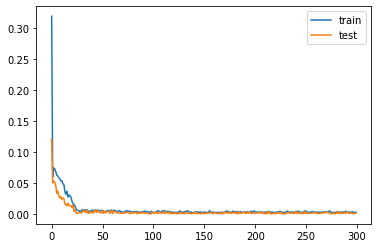

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**LOSS CURVE USING PLOTLY**

In [ ]:
from plotly.subplots import make_subplots
#  Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,)
# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axis title
fig.update_yaxes(title_text="Loss")

67/67 [==============================] - 0s 1ms/step


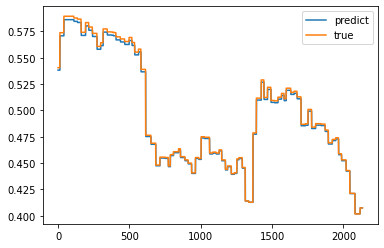

In [ ]:
yhat = model.predict(testX)
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [ ]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

**RMSE**

In [ ]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 61.391


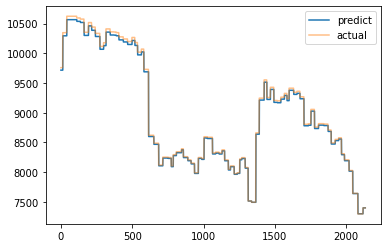

In [ ]:
plt.plot(yhat_inverse, label='predict')
plt.plot(testY_inverse, label='actual', alpha=0.5)
plt.legend()
plt.show()

**CONVERT X BACK TO DATE**

In [ ]:
predictDates = data.tail(len(testX)).Date

In [ ]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

**PLOT OF ACTUAL VS PREDICTED VALUE**

In [ ]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Test Predict Price')
py.iplot([predict_chart, actual_chart])


In [ ]:
def create_new_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
bit_data =250
bit_data=np.float64(bit_data)
bit_data=np.array(bit_data)
sent_data = 0.406
bit_data = bit_data.reshape(1,-1)
#sent_data = process_data(sent_data[len(sent_data)-5:])
live = scaler.transform(bit_data)
testX, testY = create_new_dataset(live,1, sent_data,sent=False)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#yhat = model.predict(testX)
#yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))

IndexError: ignored

In [ ]:
testX

array([], dtype=float64)

**FUNCTION TO CONVERT SERIES TO SUPERVISED LEARNING**

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
values = data[['Close']].values
values = values.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

**FRAME AS SUPERVISED LEARNING**

In [ ]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var1(t)
1,0.005648,0.003855
2,0.003855,0.003855
3,0.003855,0.002963
4,0.002963,0.003506
5,0.003506,0.004555


**TRAIN TEST SPLIT**

In [ ]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4921, 1, 1) (4921,) (2109, 1, 1) (2109,)


**LSTM MODEL WITH 300 EPOCHS**

In [ ]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

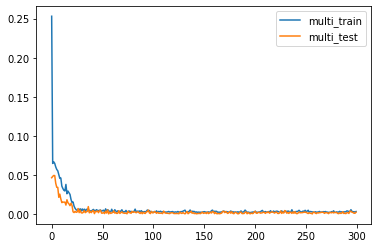

In [ ]:

plt.plot(multi_history.history['loss'], label='multi_train')
plt.plot(multi_history.history['val_loss'], label='multi_test')
plt.legend()
plt.show()

In [ ]:
from plotly.subplots import make_subplots
#  Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter( y=multi_history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=multi_history.history['loss'], name="loss"),
    secondary_y=False,)
# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axis title
fig.update_yaxes(title_text="Loss")

66/66 [==============================] - 0s 2ms/step


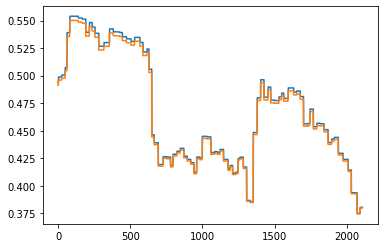

In [ ]:
yhat = multi_model.predict(test_X)
plt.plot(yhat, label='predict')
plt.plot(test_y, label='true')
plt.show()

In [ ]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 71.432


In [ ]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Test Predict Price')
py.iplot([predict_chart, actual_chart])


**PREDICTED VALUES FROM TWO MODELS VS ACTUAL PRICE**

In [ ]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
!pip install flask_ngrok

In [ ]:
!unzip '/content/templates.zip'

In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index1.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  text = request.form.get['Tweet']
  nltk.download('vader_lexicon')
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  sid = SentimentIntensityAnalyzer()
  score = ((sid.polarity_scores(str(text))))['compound']
  input_values = float(request.values['Close Price'])
  inp_features = [input_values,score]
  inp_features = np.reshape(inp_features,(-1,2))
  prediction = model.predict(inp_features)
  return render_template('index1.html',prediction_text="Bitcoin price should be")

app.run()